In [12]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('datasets/mnist-digit-train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
sorted(df['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
df_features = df.drop('label', axis=1)
df_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_labels = df['label']
df_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
def display_image(index):
    print('Digit: ', df_labels[index])

    plt.imshow(df_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  6


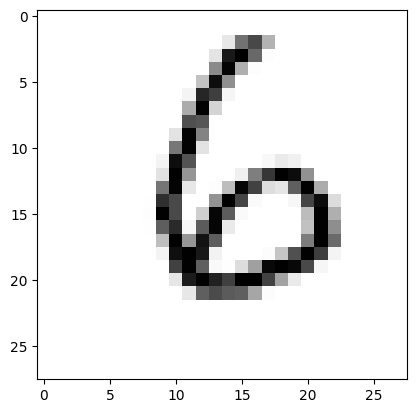

In [10]:
display_image(3899)

In [13]:
model = KMeans(n_clusters=10, max_iter=1000).fit(df_features)

In [14]:
centroids = model.cluster_centers_

centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
centroids.shape

(10, 784)

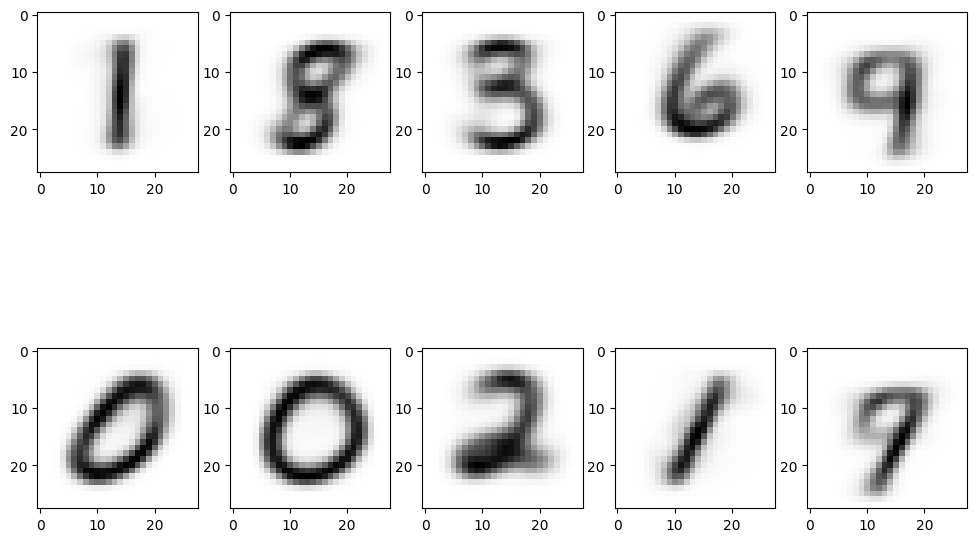

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

for centroid in range(len(centroids)):
    plt.subplot(2, 5, centroid + 1)
    plt.imshow(centroids[centroid].reshape(28, 28), cmap='Greys')

In [18]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [19]:
df_test = df.sample(10, replace=False)
df_test_features = df_test.drop('label', axis=1)
df_test_labels = df_test['label']

In [20]:
df_test_labels

4517     4
11618    1
19390    2
3857     7
4339     7
26728    2
4058     6
29598    6
13025    5
17425    6
Name: label, dtype: int64

In [21]:
df_test_labels = np.array(df_test_labels)
df_test_labels

array([4, 1, 2, 7, 7, 2, 6, 6, 5, 6])

In [22]:
pred_clusters = model.predict(df_test_features)

In [23]:
pred_results = pd.DataFrame({'actual_digit': df_test_labels,
                             'pred_cluster': pred_clusters})
pred_results.head(10)

,actual_digit,pred_cluster
0,4,9
1,1,0
2,2,3
3,7,9
4,7,9
5,2,8
6,6,3
7,6,3
8,5,1
9,6,3


In [24]:
# Mini Batch KMeans

model1 = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(df_features)

In [25]:
centroids = model1.cluster_centers_

centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
centroids.shape

(10, 784)

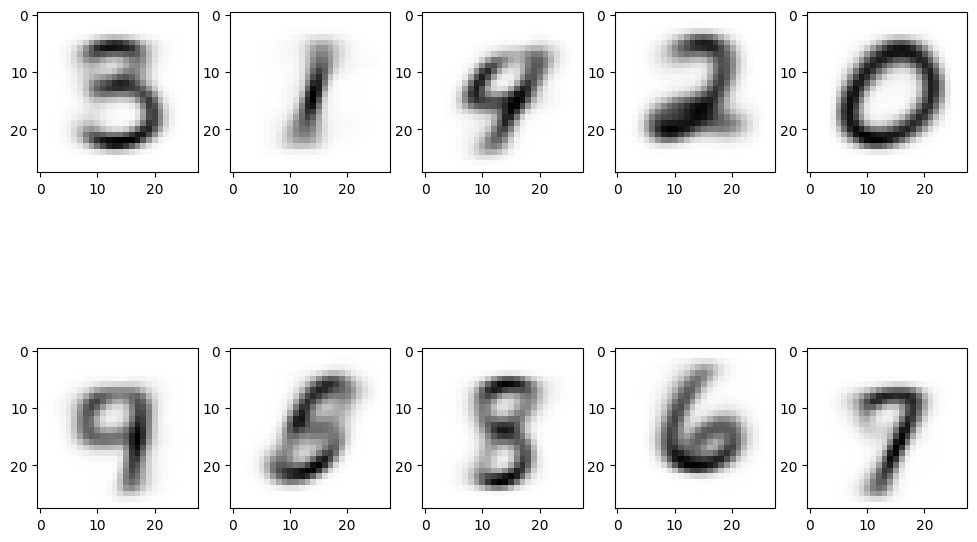

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

for centroid in range(len(centroids)):
    plt.subplot(2, 5, centroid + 1)
    plt.imshow(centroids[centroid].reshape(28, 28), cmap='Greys')

In [28]:
np.unique(model1.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [29]:
pred_clusters = model1.predict(df_test_features)
pred_results = pd.DataFrame({'actual_digit': df_test_labels,
                             'pred_cluster': pred_clusters})
pred_results.head(10)

,actual_digit,pred_cluster
0,4,2
1,1,1
2,2,8
3,7,9
4,7,9
5,2,3
6,6,6
7,6,8
8,5,6
9,6,6
